In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import ROOT
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   

px = 1/plt.rcParams['figure.dpi']

Welcome to JupyROOT 6.26/04


In [2]:
import pandas as pd
import numpy as np
from hist.get_data import get_data, get_data_in_np

# D2antiKstarpi0

In [391]:
# file_loc = '/media/jykim/ssd_T5/storage/01_recon/pi0veto_calib/D2antiKstarpi0/ntuple/control_recon_mdst_1M.root'

In [392]:
file_loc = '/media/jykim/ssd_T5/storage/01_recon/pi0veto_calib/D2antiKstarpi0/ntuple/control_recon_mdst_5M.root'

In [393]:
base_filter = 'antiKstarpi0_rank_Dstp==1'
# base_filter = 'Pis_charge==1'
tree = 'control'

In [394]:
signal_variables = ['D0_M','antiKstar_InvM','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal','antiKstarpi0_rank_Dstp','Pis_charge']


In [395]:
pd_D2antiKstar_1M = get_data(file=file_loc, tree=tree, base_filter=base_filter,variables=signal_variables )


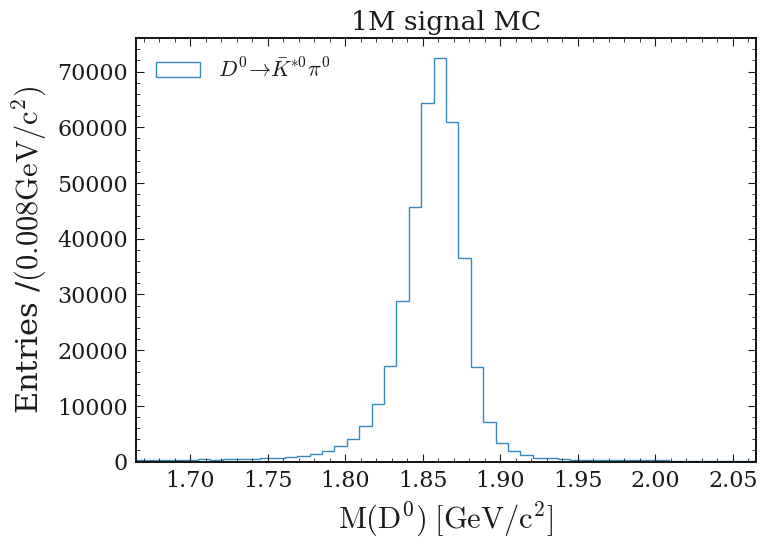

In [396]:
fig = plt.figure()
ax = fig.subplots()

xrange = (1.665,2.065,51)
xm = np.linspace(*xrange)


df = pd_D2antiKstar_1M.query('abs(antiKstar_InvM - 0.89555)<0.06 & abs(Dstarp_Q - 0.00593)<0.0006 & Dstarp_CMS_p>2.3')
plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \bar{K}^{*0} \pi^0$');


plt.legend(loc="upper left")
# ax.set_title(r'$D^0 \to K^0_S \gamma$ in ' )
ax.set_title('1M signal MC')
ax.set_xlim(1.665,2.065)

n, xe = np.histogram(df["D0_M"], bins=50, range=(1.665,2.065))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.4f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');


In [397]:
# display iminuit version
import iminuit
print("iminuit version:", iminuit.__version__)

# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit,cost

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
from iminuit.util import describe

from numba_stats import norm, crystalball
from numba_stats import truncnorm, truncexpon, norm, expon

iminuit version: 2.15.2


In [164]:
def signal_crystalball(x, s, alpha, n, CB_mu, CB_sigma):
    func = s * crystalball.pdf(x,alpha, n, CB_mu, CB_sigma)
    return s, func

In [165]:
dataset = df
dataset = dataset[(dataset['D0_M'] < 1.93) & (dataset['D0_M'] > 1.70)  ]['D0_M']

In [166]:
PDF = signal_crystalball

In [167]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST, s=73000 ,alpha=0.51, n=119, CB_mu=1.86,CB_sigma=0.02)

In [168]:
m.limits["n"]=(0,500)

m.limits["alpha"]=(0,5)
m.limits["CB_sigma"]=(0, 0.5)

m.limits["CB_mu"]=(1.78,1.90)

m.limits["s"]=(0,None)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.831e+06                 │              Nfcn = 170              │
│ EDM = 2.46e+04 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s        │  73.00e3  │  0.27e3   │            │            │    0    │         │       │
│ 1 │ alpha    │  0.5100   │  0.0029   │            │            │    0    │    5    │       │
│ 2 │ n        │    119    │     6     │            │            │    0    │   500   │       │
│ 3 │ CB_mu    │  1.86000  │  0.00011  │            │            │  1.78   │   1.9   │       │
│ 4 │ CB_sigma │ 20.00e-3  │  0.12e-3  │            │            │    0    │   0.5   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────┐
│          │         s     alpha         n     CB_mu  CB_sigma │
├──────────┼───────────────────────────────────────────────────┤
│        s │   7.3e+04 -8.41e-06  -0.00333  1.62e-07 -2.57e-07 │
│    alpha │ -8.41e-06  8.49e-06  -0.00105 -1.64e-07  1.83e-07 │
│        n │  -0.00333  -0.00105      34.4  4.48e-06 -9.26e-08 │
│    CB_mu │  1.62e-07 -1.64e-07  4.48e-06   1.3e-08 -7.55e-09 │
│ CB_sigma │ -2.57e-07  1.83e-07 -9.26e-08 -7.55e-09  1.32e-08 │
└──────────┴───────────────────────────────────────────────────┘

In [169]:
m.minos()

RuntimeError: Function minimum is not valid: <FMin algorithm='Migrad' edm=24578.722824687735 edm_goal=0.0002 errordef=1.0 fval=-1830883.3485713385 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=False hesse_failed=False is_above_max_edm=True is_valid=False nfcn=170 ngrad=0 reduced_chi2=nan time=0.1596222500083968>

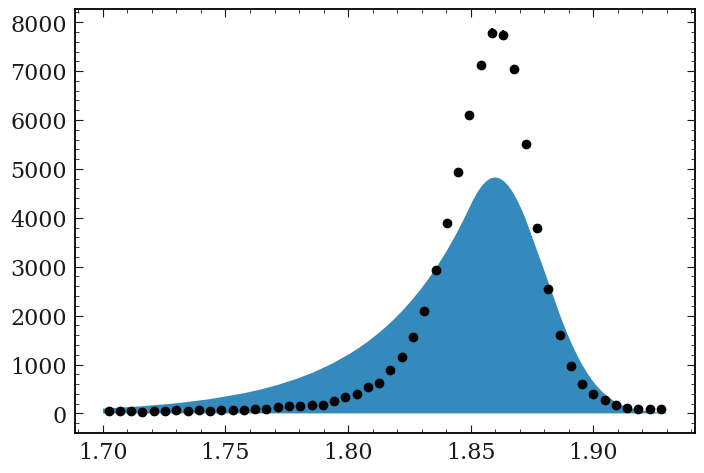

In [170]:
COST.visualize(m.values)

In [171]:
m.interactive()

true entries = 73322


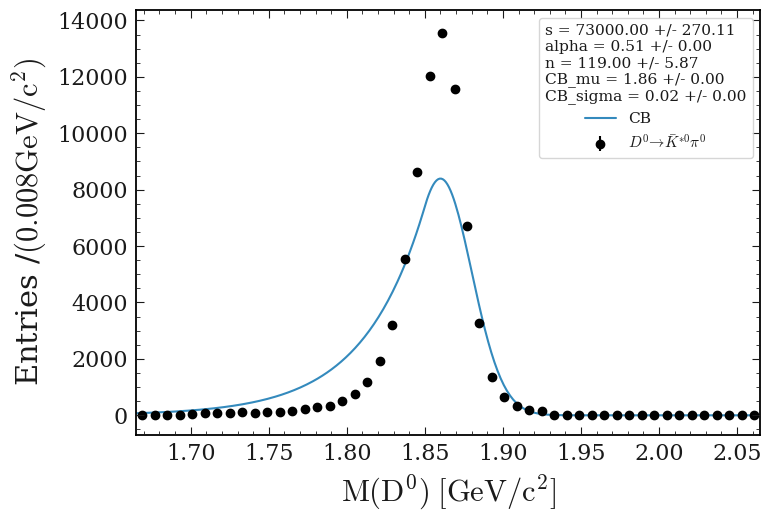

In [172]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to \bar{K}^{*0} \pi^0$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


plt.plot(xm, signal_crystalball(xm, *m.values)[1] * dx[0] ,label="CB")


# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

In [413]:
def same_mu_extended_gauss_crystalball(x, s1, s2, alpha, n, CB_sigma, mu, sigma):
    func = s1 * crystalball.pdf(x, alpha, n, mu, CB_sigma) + s2 * norm.pdf(x, mu, sigma)
#     return func
    s = s1 + s2
    return s, func

In [414]:
dataset = df
dataset = dataset[(dataset['D0_M'] < 1.93) & (dataset['D0_M'] > 1.70)  ]['D0_M']

In [415]:
PDF = same_mu_extended_gauss_crystalball

In [416]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=300000,s2=90000, alpha=1, n=30, CB_sigma=0.05, mu=1.86, sigma=0.05)

In [417]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["n"]=(0,None)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.116e+07                 │              Nfcn = 499              │
│ EDM = 0.000807 (Goal: 0.0002)    │            time = 4.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  296.4e3  │   0.5e3   │            │            │    0    │         │       │
│ 1 │ s2       │  93.6e3   │   0.5e3   │            │            │    0    │         │       │
│ 2 │ alpha    │   0.913   │   0.009   │            │            │    0    │         │       │
│ 3 │ n        │   5.53    │   0.10    │            │            │    0    │         │       │
│ 4 │ CB_sigma │ 12.88e-3  │  0.05e-3  │            │            │    0    │   0.1   │       │
│ 5 │ mu       │  1.86003  │  0.00005  │            │            │   1.8   │   1.9   │       │
│ 6 │ sigma    │ 24.37e-3  │  0.10e-3  │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  2.68e+05 -8.94e+04      0.39    -0.605   0.00351  -0.00112   0.00892 │
│       s2 │ -8.94e+04  2.66e+05    -0.659      1.02  -0.00593    0.0019   -0.0151 │
│    alpha │      0.39    -0.659  8.01e-05 -0.000792  3.13e-07 -3.38e-07  3.36e-07 │
│        n │    -0.605      1.02 -0.000792    0.0105 -2.05e-06  2.86e-06 -3.03e-06 │
│ CB_sigma │   0.00351  -0.00593  3.13e-07 -2.05e-06  2.44e-09 -1.63e-09  6.57e-10 │
│       mu │  -0.00112    0.0019 -3.38e-07  2.86e-06 -1.63e-09  2.42e-09 -1.44e-09 │
│    sigma │   0.00892   -0.0151  3.36e-07 -3.03e-06  6.57e-10 -1.44e-09   9.1e-09 │
└──────────┴───────────────────────────────────────────────────────────────────────┘

In [418]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.116e+07                 │             Nfcn = 5613              │
│ EDM = 0.000807 (Goal: 0.0002)    │           time = 43.9 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  296.4e3  │   0.5e3   │   -0.5e3   │   2.7e3    │    0    │         │       │
│ 1 │ s2       │  93.6e3   │   0.5e3   │   -2.8e3   │   2.9e3    │    0    │         │       │
│ 2 │ alpha    │   0.913   │   0.009   │   -0.012   │   0.012    │    0    │         │       │
│ 3 │ n        │   5.53    │   0.10    │   -0.10    │    0.10    │    0    │         │       │
│ 4 │ CB_sigma │ 12.88e-3  │  0.05e-3  │  -0.09e-3  │  0.09e-3   │    0    │   0.1   │       │
│ 5 │ mu       │  1.86003  │  0.00005  │  -0.00006  │  0.00006   │   1.8   │   1.9   │       │
│ 6 │ sigma    │ 24.37e-3  │  0.10e-3  │  -0.21e-3  │  0.21e-3   │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          s1           │          s2           │         alpha         │           n           │       CB_sigma        │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.5e3   │   2.7e3   │  -2.8e3   │   2.9e3   │  -0.012   │   0.012   │   -0.1    │    0.1    │ -0.09e-3  │  0.09e-3  │ -0.06e-3  │  0.06e-3  │ -0.21e-3  │  0.21e-3  │
│  Valid   │   False   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  2.68e+05 -8.94e+04      0.39    -0.605   0.00351  -0.00112   0.00892 │
│       s2 │ -8.94e+04  2.66e+05    -0.659      1.02  -0.00593    0.0019  

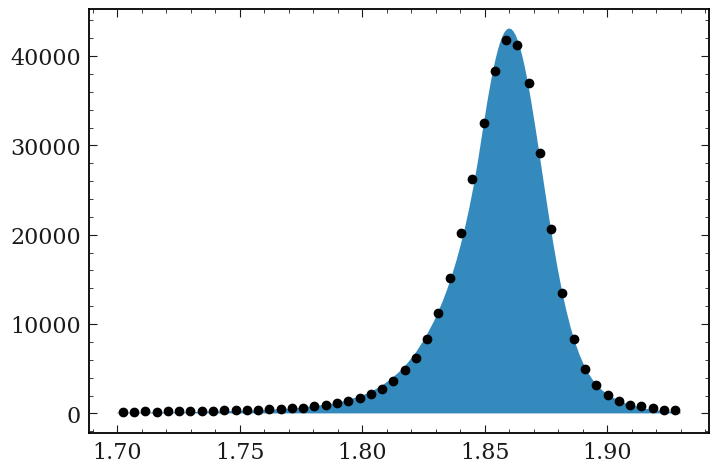

In [419]:
COST.visualize(m.values)

true entries = 389978


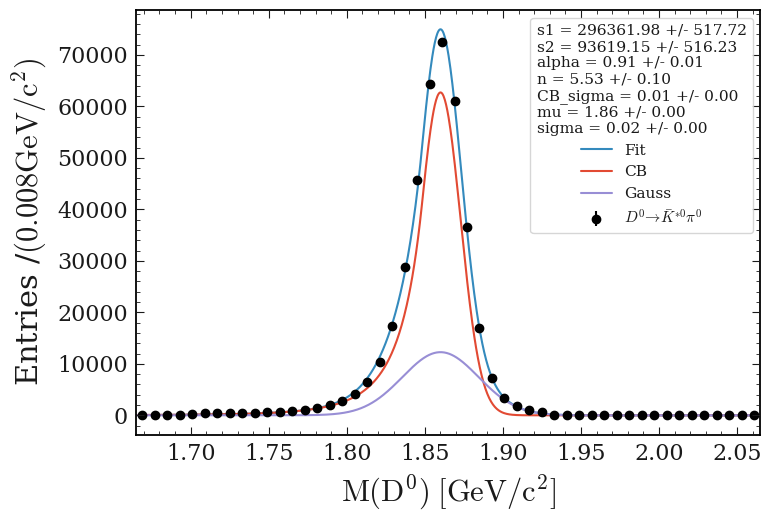

In [420]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.665,2.065,1000)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to \bar{K}^{*0} \pi^0$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0] ,label="Fit")
# alpha, n, mu, CB_sigma
plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['alpha'], m.values['n'], m.values['mu'], m.values['CB_sigma']) * dx[0],label="CB")

plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")




# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

In [367]:
def same_mu_extended_2gauss_crystalball(x, s1, s2,s3, alpha, n, CB_sigma, mu, sigma, sigma2):
    func = s1 * crystalball.pdf(x, alpha, n, mu, CB_sigma) + s2 * norm.pdf(x, mu, sigma) + s3 * norm.pdf(x, mu, sigma2)
#     return func
    s = s1 + s2 + s3
    return s, func

In [368]:
dataset = df
dataset = dataset[(dataset['D0_M'] < 1.93) & (dataset['D0_M'] > 1.70)  ]['D0_M']

# dataset = dataset[(dataset['D0_M'] < 1.89) & (dataset['D0_M'] > 1.83)  ]['D0_M']

In [369]:
PDF = same_mu_extended_2gauss_crystalball

In [370]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=35000,s2=30000, s3= 2000, alpha=1, n=30, CB_sigma=0.05, mu=1.86, sigma=0.05,sigma2=0.05)

In [371]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["s3"]=(0,None)
m.limits["n"]=(0,None)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma","sigma2"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.853e+06                 │             Nfcn = 1223              │
│ EDM = 0.000158 (Goal: 0.0002)    │            time = 2.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  20.0e3   │   0.8e3   │            │            │    0    │         │       │
│ 1 │ s2       │  15.7e3   │   1.4e3   │            │            │    0    │         │       │
│ 2 │ s3       │  37.6e3   │   1.5e3   │            │            │    0    │         │       │
│ 3 │ alpha    │   0.346   │   0.016   │            │            │    0    │         │       │
│ 4 │ n        │ 120.5861  │  0.0028   │            │            │    0    │         │       │
│ 5 │ CB_sigma │  10.7e-3  │  0.5e-3   │            │            │    0    │   0.1   │       │
│ 6 │ mu       │  1.86003  │  0.00014  │            │            │   1.8   │   1.9   │       │
│ 7 │ sigma    │  25.2e-3  │  0.5e-3   │            │            │    0    │   0.1   │       │
│ 8 │ sigma2   │ 14.13e-3  │  0.23e-3  │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│          │        s1        s2        s3     alpha         n  CB_sigma        mu     sigma    sigma2 │
├──────────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│       s1 │  6.24e+05 -2.14e+05 -3.91e+05      4.32   0.00035   0.00322    0.0589   0.00471    0.0165 │
│       s2 │ -2.14e+05  1.98e+06 -1.75e+06      1.21  1.74e-05    0.0932   -0.0335    -0.682    -0.279 │
│       s3 │ -3.91e+05 -1.75e+06  2.18e+06     -5.53 -0.000364   -0.0962   -0.0256     0.678     0.263 │
│    alpha │      4.32      1.21     -5.53  0.000262  2.42e-08   7.3e-06 -1.17e-06  5.32e-07 -1.04e-06 │
│        n │   0.00035  1.74e-05 -0.000364  2.42e-08  7.56e-06  6.99e-10 -1.18e-10  8.93e-11  -8.8e-11 │
│ CB_sigma │   0.00322    0.0932   -0.0962   7.3e-06  6.99e-10  2.39e-07 -4.99e-08  1.05e-08 -3.97e-08 │
│       mu │    0.0589   -0.0335   -0.0256 -1.17e-06 -1.18e-10 -4.99e-08  2.11e-08 -5.52e-09  8.19e-09 │
│    sigma │   0.00471    -0.682     0.678  5.32e-07  8.93e-11  1.05e-08 -5.52e-09  2.98e-07   8.8e-08 │
│   sigma2 │    0.0165    -0.279     0.263 -1.04e-06  -8.8e-11 -3.97e-08  8.19e-09   8.8e-08  5.12e-08 │
└──────────┴───────────────────────────────────────────────────────────────────────────────────────────┘

In [372]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.853e+06                 │             Nfcn = 6217              │
│ EDM = 0.000158 (Goal: 0.0002)    │            time = 7.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  20.0e3   │   0.8e3   │   -0.8e3   │   0.8e3    │    0    │         │       │
│ 1 │ s2       │  15.7e3   │   1.4e3   │   -1.3e3   │   1.3e3    │    0    │         │       │
│ 2 │ s3       │  37.6e3   │   1.5e3   │   -1.4e3   │   1.3e3    │    0    │         │       │
│ 3 │ alpha    │   0.346   │   0.016   │   -0.016   │   0.016    │    0    │         │       │
│ 4 │ n        │ 120.5861  │  0.0028   │  -0.0027   │   0.0027   │    0    │         │       │
│ 5 │ CB_sigma │  10.7e-3  │  0.5e-3   │  -0.5e-3   │   0.5e-3   │    0    │   0.1   │       │
│ 6 │ mu       │  1.86003  │  0.00015  │  -0.00014  │  0.00014   │   1.8   │   1.9   │       │
│ 7 │ sigma    │  25.2e-3  │  0.5e-3   │  -0.5e-3   │   0.5e-3   │    0    │   0.1   │       │
│ 8 │ sigma2   │ 14.13e-3  │  0.23e-3  │  -0.22e-3  │  0.22e-3   │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          s1           │          s2           │          s3           │         alpha         │           n           │       CB_sigma        │          mu           │         sigma         │        sigma2         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.8e3   │   0.8e3   │  -1.3e3   │   1.3e3   │  -1.4e3   │   1.3e3   │  -0.016   │   0.016   │  -0.0028  │  0.0027   │  -0.5e-3  │  0.5e-3   │ -0.14e-3  │  0.14e-3  │  -0.5e-3  │  0.5e-3   │ -0.22e-3  │  0.22e-3  │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   False   │   True    │   False   │   False   │   False   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴─────────

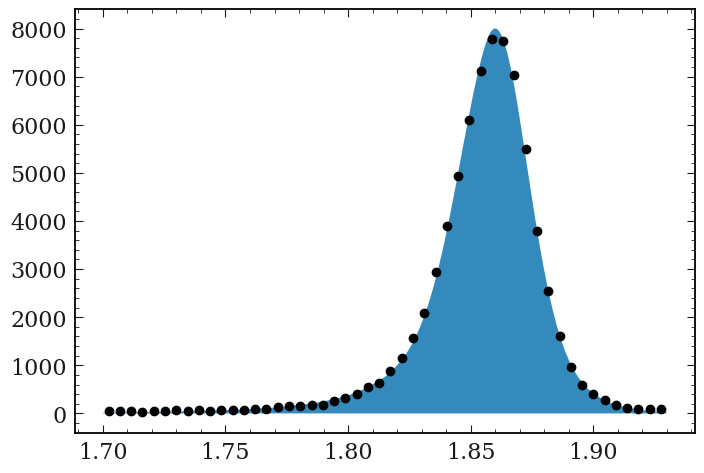

In [373]:
COST.visualize(m.values)

true entries = 73322


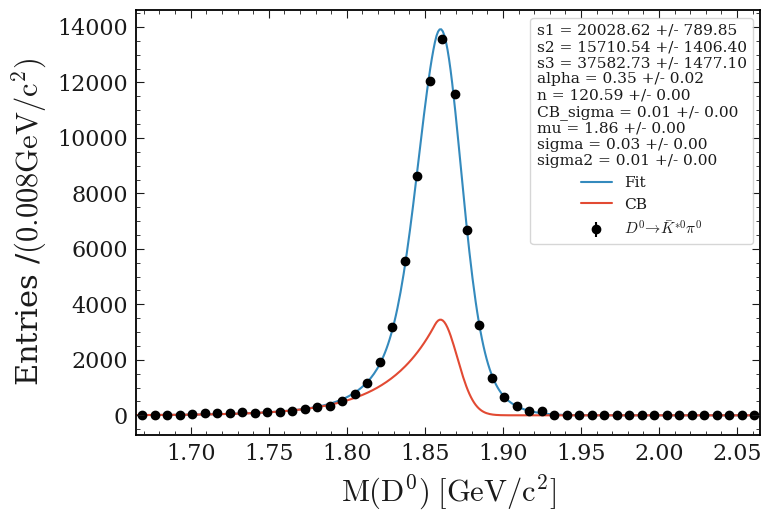

In [374]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to \bar{K}^{*0} \pi^0$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


plt.plot(xm, same_mu_extended_2gauss_crystalball(xm, *m.values)[1] * dx[0] ,label="Fit")
plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['alpha'], m.values['n'], m.values['mu'], m.values['CB_sigma']) * dx[0],label="CB")




# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

# D2antiKstargamma

In [436]:
file_loc = '/media/jykim/ssd_T5/storage/01_recon/pi0veto_calib/D2antiKstarpi0/ntuple/control_recon_mdst_5M.root'

In [437]:
# base_filter = 'antiKstarpi0_rank_Dstp==1'
base_filter = 'Pis_charge==1'
tree = 'antiKstargamma'

In [438]:
signal_variables = ['D0_M','antiKstar_InvM','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal','Pis_charge','Pi0_Prob']


In [439]:
pd_D2antiKstargamma = get_data(file=file_loc, tree=tree, base_filter=base_filter,variables=signal_variables )


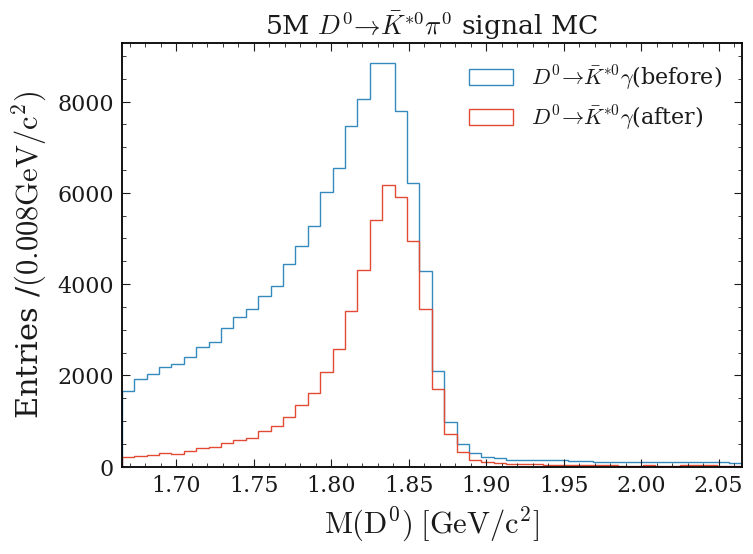

In [450]:
fig = plt.figure()
ax = fig.subplots()

xrange = (1.665,2.065,51)
xm = np.linspace(*xrange)


df = pd_D2antiKstargamma.query('abs(antiKstar_InvM - 0.89555)<0.06 & abs(Dstarp_Q - 0.00593)<0.0006 & Dstarp_CMS_p>2.3')
plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \bar{K}^{*0} \gamma$(before)');

df = pd_D2antiKstargamma.query('Pi0_Prob<0.9 & abs(antiKstar_InvM - 0.89555)<0.06 & abs(Dstarp_Q - 0.00593)<0.0006 & Dstarp_CMS_p>2.3')
plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \bar{K}^{*0} \gamma$(after)');

plt.legend(loc="best")
# ax.set_title(r'$D^0 \to K^0_S \gamma$ in ' )
ax.set_title(r'5M $D^0 \to \bar{K}^{*0} \pi^0$ signal MC')
ax.set_xlim(1.665,2.065)

n, xe = np.histogram(df["D0_M"], bins=50, range=(1.665,2.065))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.4f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');


## After pi0 veto

In [535]:
def signal_crystalball(x, s, alpha, n, CB_mu, CB_sigma):
    func = s * crystalball.pdf(x,alpha, n, CB_mu, CB_sigma)
    return s, func

In [536]:
dataset = df
dataset = dataset[(dataset['D0_M'] < 1.90) & (dataset['D0_M'] > 1.67)  ]['D0_M']

In [537]:
PDF = signal_crystalball

In [538]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST, s=50000 ,alpha=0.51, n=50, CB_mu=1.84,CB_sigma=0.02)

In [539]:
m.limits["alpha"]=(0,30)
m.limits["n"]=(0,None)
# m.limits["CB_mu"]=(1.78,1.90)
m.limits["CB_sigma"]=(0, 0.5)


m.limits["s"]=(0,None)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.202e+06                 │              Nfcn = 260              │
│ EDM = 5.21 (Goal: 0.0002)        │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s        │  50.87e3  │  0.23e3   │            │            │    0    │         │       │
│ 1 │ alpha    │   0.474   │   0.006   │            │            │    0    │   30    │       │
│ 2 │ n        │    103    │    21     │            │            │    0    │         │       │
│ 3 │ CB_mu    │  1.84054  │  0.00021  │            │            │         │         │       │
│ 4 │ CB_sigma │ 18.07e-3  │  0.14e-3  │            │            │    0    │   0.5   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────┐
│          │         s     alpha         n     CB_mu  CB_sigma │
├──────────┼───────────────────────────────────────────────────┤
│        s │  5.06e+04 -2.99e-05     0.274  8.44e-07 -3.68e-07 │
│    alpha │ -2.99e-05  3.04e-05   -0.0424 -9.01e-07  6.54e-07 │
│        n │     0.274   -0.0424       448  0.000562 -0.000231 │
│    CB_mu │  8.44e-07 -9.01e-07  0.000562  4.29e-08 -2.33e-08 │
│ CB_sigma │ -3.68e-07  6.54e-07 -0.000231 -2.33e-08  2.05e-08 │
└──────────┴───────────────────────────────────────────────────┘

In [540]:
m.minos()

RuntimeError: Function minimum is not valid: <FMin algorithm='Migrad' edm=5.206805088145364 edm_goal=0.0002 errordef=1.0 fval=-1202438.0001306138 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=False hesse_failed=False is_above_max_edm=True is_valid=False nfcn=260 ngrad=0 reduced_chi2=nan time=0.18244467799377162>

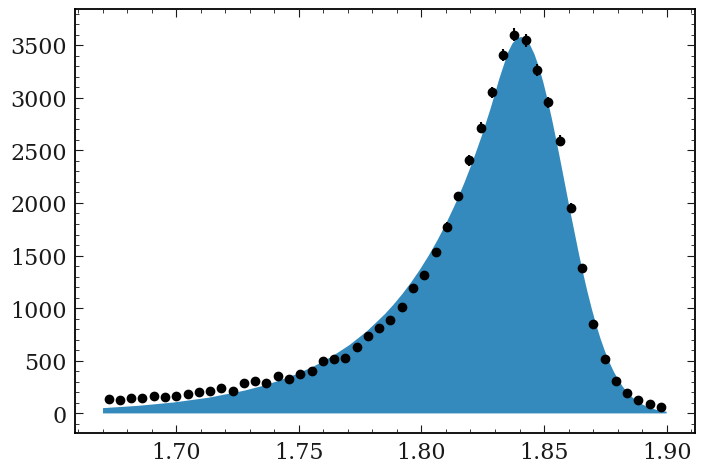

In [541]:
COST.visualize(m.values)

In [542]:
m.interactive()

true entries = 50955


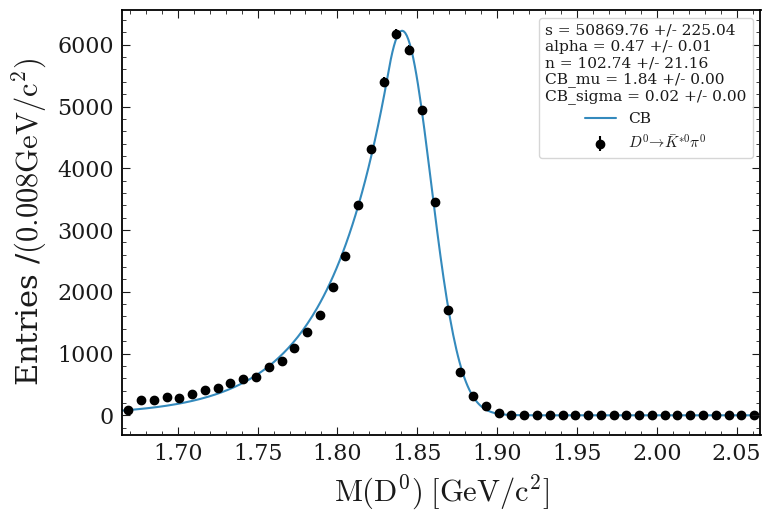

In [543]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to \bar{K}^{*0} \pi^0$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


plt.plot(xm, signal_crystalball(xm, *m.values)[1] * dx[0] ,label="CB")


# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

## Before pi0 veto

In [586]:
df = pd_D2antiKstargamma.query('abs(antiKstar_InvM - 0.89555)<0.06 & abs(Dstarp_Q - 0.00593)<0.0006 & Dstarp_CMS_p>2.3')


In [587]:
def signal_crystalball(x, s, alpha, n, CB_mu, CB_sigma):
    func = s * crystalball.pdf(x,alpha, n, CB_mu, CB_sigma)
    return s, func

In [588]:
dataset = df
dataset = dataset[(dataset['D0_M'] < 1.90) & (dataset['D0_M'] > 1.67)  ]['D0_M']

In [589]:
PDF = signal_crystalball

In [590]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST, s=11000 ,alpha=0.51, n=50, CB_mu=1.84,CB_sigma=0.02)

In [591]:
m.limits["alpha"]=(0,30)
m.limits["n"]=(0,500)
# m.limits["CB_mu"]=(1.78,1.90)
m.limits["CB_sigma"]=(0, 0.5)


m.limits["s"]=(0,None)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -2.864e+06                 │              Nfcn = 365              │
│ EDM = 74.3 (Goal: 0.0002)        │            time = 0.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s        │ 117.01e3  │  0.34e3   │            │            │    0    │         │       │
│ 1 │ alpha    │   0.421   │   0.004   │            │            │    0    │   30    │       │
│ 2 │ n        │    111    │     6     │            │            │    0    │   500   │       │
│ 3 │ CB_mu    │  1.82703  │  0.00025  │            │            │         │         │       │
│ 4 │ CB_sigma │ 24.05e-3  │  0.17e-3  │            │            │    0    │   0.5   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────┐
│          │         s     alpha         n     CB_mu  CB_sigma │
├──────────┼───────────────────────────────────────────────────┤
│        s │  1.17e+05  -0.00524      1.78  0.000273 -0.000211 │
│    alpha │  -0.00524  1.56e-05  -0.00296 -8.82e-07  6.02e-07 │
│        n │      1.78  -0.00296      36.5  6.97e-05 -3.48e-05 │
│    CB_mu │  0.000273 -8.82e-07  6.97e-05  6.38e-08 -3.68e-08 │
│ CB_sigma │ -0.000211  6.02e-07 -3.48e-05 -3.68e-08  2.76e-08 │
└──────────┴───────────────────────────────────────────────────┘

In [592]:
m.minos()

RuntimeError: Function minimum is not valid: <FMin algorithm='Migrad' edm=74.29384797920831 edm_goal=0.0002 errordef=1.0 fval=-2864072.764464513 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=False hesse_failed=False is_above_max_edm=True is_valid=False nfcn=365 ngrad=0 reduced_chi2=nan time=0.651676181005314>

In [ ]:
COST.visualize(m.values)

In [593]:
m.interactive()

true entries = 116836


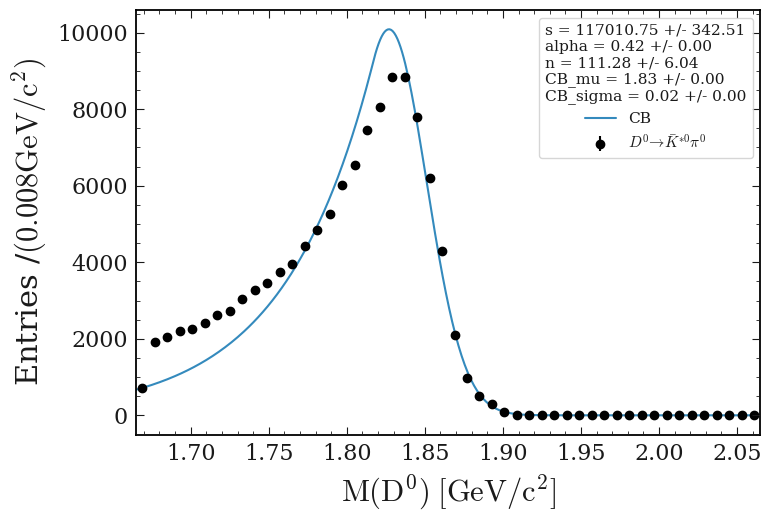

In [595]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to \bar{K}^{*0} \pi^0$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


plt.plot(xm, signal_crystalball(xm, *m.values)[1] * dx[0] ,label="CB")


# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))